In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
dataset = pd.read_csv('DataForClustering_AllData_2.csv')
dataset.head()


,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,FR3Mts,FR6Mts,FR12Mts
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.04,0.11,0.19
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.04,0.04,0.09
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.05,0.07,0.11
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.07,0.00,0.17
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.00,0.03,0.09


In [61]:
dataset['Class'] = np.where(dataset['FR6Mts'] > 0.05, 1, 0)
dataset.head()

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,FR3Mts,FR6Mts,FR12Mts,Class
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.04,0.11,0.19,1
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.04,0.04,0.09,0
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.05,0.07,0.11,1
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.07,0.00,0.17,0
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.00,0.03,0.09,0


In [62]:
dropped_values = dataset.drop(['XLF','XLK','XLI','HY','XLY','XLU','XLP','SPY','VBMFX'],axis=1)
dropped_values

,Date,FR3Mts,FR6Mts,FR12Mts,Class
0,12/1/1998,0.04,0.11,0.19,1
1,1/1/1999,0.04,0.04,0.09,0
2,2/1/1999,0.05,0.07,0.11,1
3,3/1/1999,0.07,0.00,0.17,0
4,4/1/1999,0.00,0.03,0.09,0
...,...,...,...,...,...
236,8/1/2018,-0.05,-0.04,0.01,0
237,9/1/2018,-0.14,-0.03,0.02,0
238,10/1/2018,0.00,0.09,0.12,1
239,11/1/2018,0.01,0.00,0.14,0


In [63]:
import statsmodels.api as sm

In [64]:
X = dataset.drop(['Date','FR3Mts','FR6Mts','FR12Mts','Class'], 1)
y = dataset['Class']

In [65]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.585310
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.136     
Dependent Variable: Class            AIC:              300.1195  
Date:               2020-02-17 20:27 BIC:              331.4827  
No. Observations:   241              Log-Likelihood:   -141.06   
Df Model:           8                LL-Null:          -163.19   
Df Residuals:       232              LLR p-value:      5.0720e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
XLF       -0.0188     0.0753   -0.2500   0.8026   -0.1663    0.1287
XLK        0.1409     0.0735    1.9177   0.0551   -0.0031 

In [66]:
dataset2 = dataset.drop(['Date','FR3Mts','FR6Mts','FR12Mts','XLF','XLI','XLP'],axis=1)
dataset2

,XLK,HY,XLY,XLU,SPY,VBMFX,Class
0,32.625000,6.44,26.125000,30.234375,123.312500,10.27,1
1,37.812500,6.52,27.468750,29.484375,127.656250,10.30,0
2,34.062500,6.46,27.296875,28.671875,123.562500,10.07,1
3,36.593750,6.57,28.593750,26.687500,128.375000,10.06,0
4,36.812500,6.80,29.343750,29.265625,133.250000,10.05,0
...,...,...,...,...,...,...,...
236,75.599998,3.44,116.949997,53.470001,290.309998,10.44,0
237,75.330002,3.44,117.220001,52.650002,290.720001,10.36,0
238,69.300003,3.37,105.379997,53.689999,270.630005,10.26,1
239,67.940002,3.31,107.989998,55.590000,275.649994,10.29,0


In [67]:
X = dataset2.drop('Class', 1)
y = dataset2['Class']

In [68]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.589775
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: Class            AIC:              296.2718  
Date:               2020-02-17 20:27 BIC:              317.1805  
No. Observations:   241              Log-Likelihood:   -142.14   
Df Model:           5                LL-Null:          -163.19   
Df Residuals:       235              LLR p-value:      5.5915e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
XLK        0.1350     0.0407    3.3180   0.0009    0.0553    0.2148
HY         0.6262     0.2824    2.2174   0.0266    0.0727 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Aalok Devkota\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.6438


In [72]:
# Actual class predictions
logreg_predictions = logreg.predict(X_test)
# Probabilities for each class
logreg_probs = logreg.predict_proba(X_test)[:, 1]

logreg_probs_train = logreg.predict_proba(X_train)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, logreg_probs)
roc_value

0.7258064516129032

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[34  8]
 [18 13]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81        48
           1       0.75      0.24      0.36        25

    accuracy                           0.71        73
   macro avg       0.73      0.60      0.59        73
weighted avg       0.72      0.71      0.66        73



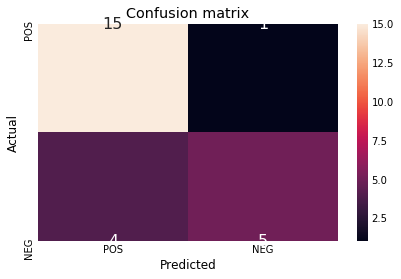

In [28]:
df_cm = pd.DataFrame(confusion_matrix, ['POS', 'NEG'], ['POS', 'NEG'])

sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g')

# sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# # ax.xaxis.set_label_position("top")
# # plt.tight_layout()
plt.title('Confusion matrix', y=6.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

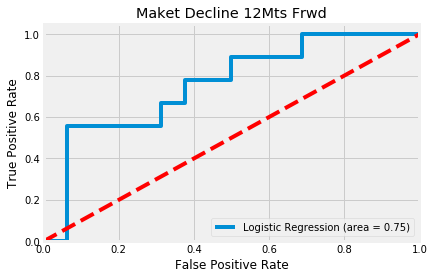

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Maket Decline 12Mts Frwd')
plt.legend(loc="lower right")

plt.show()

In [30]:
# X_test['Prob'] = logreg_probs.tolist()
# X_test

# frames = [dropped_values, X_test]

# result = pd.concat(frames, axis=1, sort=False)
# result

# result.to_csv(r'LR_Down_Results_42.csv')

In [31]:
new_dataset = pd.read_csv('data/DataToPredict.csv')
new_dataset
new_dataset2 = new_dataset.drop(['XLP','VBMFX','XLI','XLK','Date'],axis=1)
new_dataset2

,XLF,HY,XLY,XLU,SPY
0,25.940001,3.35,108.779999,54.759998,269.929993
1,26.520000,3.39,110.209999,57.009998,278.679993
2,25.709999,3.40,113.849998,58.169998,282.480011
3,28.020000,3.43,120.070000,58.709999,294.019989
4,26.010000,3.37,110.940002,58.250000,275.269989
5,27.600000,3.43,119.199997,59.630001,293.000000
6,28.250000,3.42,120.720001,59.549999,297.429993
7,26.920000,3.43,119.580002,62.580002,292.450012
8,28.000000,3.42,120.699997,64.739998,296.769989
9,28.700001,3.43,120.849998,64.250000,303.329987


In [32]:
predict_new_dataset = logreg.predict(new_dataset2)
predict_new_dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
new_score = logreg.predict_proba(new_dataset2)[:, 1]
new_score

array([0.1190893 , 0.15067514, 0.09464554, 0.09966138, 0.09564208,
       0.09450901, 0.1111489 , 0.06394586, 0.07155851, 0.12136801,
       0.24596362, 0.24145939, 0.17148033, 0.19264252])

In [23]:
new_dataset['Prob'] = new_score.tolist()
newLogR_Down = pd.DataFrame(new_dataset)
newLogR_Down

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Prob
0,1/1/2019,25.940001,66.279999,71.769997,3.35,108.779999,54.759998,53.389999,269.929993,10.53,0.000744
1,2/1/2019,26.520000,70.860001,76.339996,3.39,110.209999,57.009998,54.340000,278.679993,10.50,0.001842
2,3/1/2019,25.709999,74.000000,75.029999,3.40,113.849998,58.169998,56.110001,282.480011,10.68,0.000530
3,4/1/2019,28.020000,78.709999,78.010002,3.43,120.070000,58.709999,57.709999,294.019989,10.66,0.000425
4,5/1/2019,26.010000,71.889999,72.050003,3.37,110.940002,58.250000,55.610001,275.269989,10.83,0.000666
5,6/1/2019,27.600000,78.040001,77.419998,3.43,119.199997,59.630001,58.070000,293.000000,10.93,0.000411
6,7/1/2019,28.250000,80.769997,77.820000,3.42,120.720001,59.549999,59.430000,297.429993,10.93,0.000819
7,8/1/2019,26.920000,79.529999,75.760002,3.43,119.580002,62.580002,60.720001,292.450012,11.21,0.000396
8,9/1/2019,28.000000,80.529999,77.629997,3.42,120.699997,64.739998,61.419998,296.769989,11.12,0.000696
9,10/1/2019,28.700001,83.669998,78.110001,3.43,120.849998,64.250000,61.160000,303.329987,11.12,0.002203


In [35]:
X_test['Prob'] = logreg_probs_train.tolist()
X_test

# frames = [dropped_values, X_train]

# result = pd.concat(frames, axis=1, sort=False)
# result

# result.to_csv(r'RF_DOWN_LR_ResultsTrain_42.csv')

C:\Users\Aalok Devkota\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,XLF,HY,XLY,XLU,SPY
24,23.964256,5.18,25.593750,33.187500,131.187500
6,21.197197,6.56,29.781250,30.640625,137.000000
222,24.670000,3.53,89.629997,51.959999,241.800003
208,18.935825,3.31,79.199997,48.419998,206.330002
236,28.330000,3.44,116.949997,53.470001,290.309998
173,16.116978,3.90,56.119999,37.680000,163.449997
197,19.983753,3.63,76.300003,44.639999,211.139999
220,23.530001,3.54,90.059998,51.700001,238.080002
9,17.973192,6.33,26.078125,29.781250,128.750000
113,20.113729,4.54,32.310001,41.310001,140.350006
